#import Libraries and dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DataSets/insurance_claims.csv')

In [ ]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


#Details of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [ ]:
listask=[]
for i in df:
   if '?' in df[i].unique():
    listask.append(i)
    print(i)
print(listask)

collision_type
property_damage
police_report_available
['collision_type', 'property_damage', 'police_report_available']


<ipython-input-8-4c2ceaaaaf53>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '?' in df[i].unique():


In [ ]:
for i in range(len(listask)):
  print(f'Column {listask[i]}: {df[listask[i]].unique()}')

Column collision_type: ['Side Collision' '?' 'Rear Collision' 'Front Collision']
Column property_damage: ['YES' '?' 'NO']
Column police_report_available: ['YES' '?' 'NO']


In [ ]:
a=df['fraud_reported'].value_counts()['Y']
b=df['fraud_reported'].value_counts()['N']
c=df['collision_type'].value_counts()['?']
d=df['property_damage'].value_counts()['?']
e=df['police_report_available'].value_counts()['?']
print(f'{a}+{b}={a+b}\n{c,d,e}')

247+753=1000
(178, 360, 343)


#Clean Dataset

In [ ]:
cleaned_df=df.copy()

In [ ]:
cleaned_df=cleaned_df.replace('?',np.NaN)

In [ ]:
cleaned_df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
fraud_reported = cleaned_df['fraud_reported'].value_counts()
fraud_reported

N    753
Y    247
Name: fraud_reported, dtype: int64

In [ ]:
cleaned_df['collision_type'].fillna(cleaned_df['collision_type'].mode()[0],inplace=True)
cleaned_df['property_damage'].fillna('NO', inplace = True)
cleaned_df['police_report_available'].fillna('NO', inplace = True)

In [ ]:
cleaned_df.drop('_c39', axis=1, inplace=True)

In [ ]:
cleaned_df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [ ]:
# cleaned_df.drop(['policy_number', 'policy_bind_date','incident_date','incident_location','auto_year',
#                  'auto_model','auto_make','total_claim_amount','_c39','months_as_customer','policy_annual_premium',
#                  'insured_zip','insured_sex','capital-gains','capital-loss','incident_city','injury_claim','property_claim',
#                  'vehicle_claim'],
#                 axis=1, inplace=True)

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

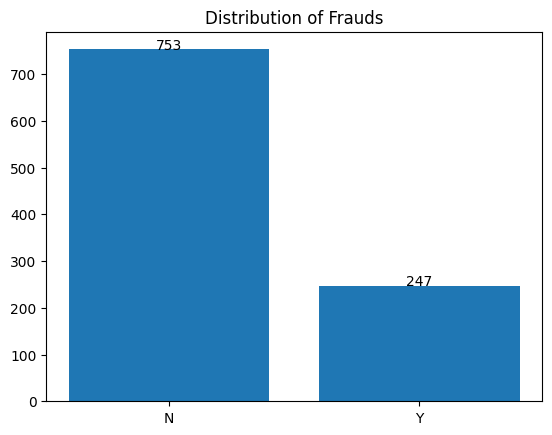

In [ ]:
plt.bar(fraud_reported.index,fraud_reported.values)
addlabels(fraud_reported.index,fraud_reported.values)
plt.title("Distribution of Frauds")
plt.show()

In [ ]:
insured_occupation=cleaned_df['insured_occupation'].value_counts()

In [ ]:
colors = []
for i in range(len(insured_occupation.index)):
  r=np.random.random()
  g=np.random.random()
  b=np.random.random()
  colors.append((r, g, b))

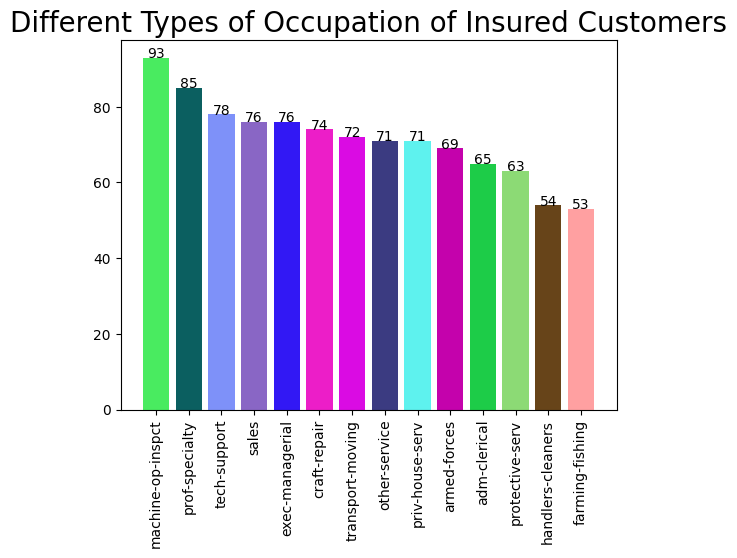

In [ ]:
plt.bar(insured_occupation.index,insured_occupation.values,color=colors)
addlabels(insured_occupation.index,insured_occupation.values)
plt.title('Different Types of Occupation of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

#Interesting Features

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for i in cleaned_df:
  if cleaned_df[i].dtype != "int64" and cleaned_df[i].dtype != 'float64':
    cleaned_df[i]=LabelEncoder().fit_transform(cleaned_df[i])

In [ ]:
cleaned_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,940,2,1,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,635,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,413,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,19,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,922,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0


In [ ]:
for column in cleaned_df.columns:
  cleaned_df[column] = (cleaned_df[column] - cleaned_df[column].min()) / (cleaned_df[column].max() - cleaned_df[column].min())

In [ ]:
cleaned_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,0.684760,0.644444,0.468247,0.989474,1.0,0.5,0.333333,0.603112,0.090909,0.188769,...,0.666667,1.0,0.622801,0.303497,0.550063,0.654296,0.769231,0.026316,0.45,1.0
1,0.475992,0.511111,0.269370,0.668421,0.5,0.5,1.000000,0.473214,0.545455,0.199478,...,0.000000,0.0,0.043285,0.036364,0.032953,0.043276,0.615385,0.315789,0.60,1.0
2,0.279749,0.222222,0.653098,0.434737,1.0,0.0,1.000000,0.606972,0.545455,0.002766,...,1.000000,0.0,0.300906,0.358974,0.162653,0.289722,0.307692,0.789474,0.60,0.0
3,0.534447,0.488889,0.141334,0.020000,0.0,0.5,1.000000,0.608582,0.636364,0.932699,...,0.666667,0.0,0.551298,0.295571,0.267850,0.637187,0.230769,0.894737,0.95,1.0
4,0.475992,0.555556,0.296730,0.970526,0.0,1.0,0.333333,0.712760,0.636364,0.946264,...,0.333333,0.0,0.055739,0.060606,0.027461,0.056359,0.000000,0.815789,0.70,0.0


In [ ]:
correlation_matrix = cleaned_df.corr()
correlation_matrix

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,-0.048634,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,-0.037062,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,-0.039443,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,0.031190,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,-0.048634,-0.037062,-0.039443,1.000000,-0.005721,-0.016073,-0.050113,0.000994,0.047044,0.000157,...,0.056147,-0.013050,0.000004,0.001812,0.000266,-0.000530,-0.005228,0.026408,0.012811,-0.000856
policy_state,-0.000328,-0.014533,0.072815,-0.005721,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,-0.016073,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.050113,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,0.000994,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,0.047044,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.000157,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368


In [ ]:
target_column='fraud_reported'

In [ ]:
correlation_with_target = correlation_matrix[target_column].drop(target_column)
sorted_features = correlation_with_target.abs().sort_values(ascending=False)
print("Correlation with Target Variable:")
print(sorted_features)

Correlation with Target Variable:
incident_severity              0.405988
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
incident_state                 0.051407
incident_date                  0.050710
incident_type                  0.050376
witnesses                      0.049497
insured_hobbies                0.046838
authorities_contacted          0.045802
incident_city                  0.040403
policy_csl                     0.037190
bodily_injuries                0.033877
insured_sex                    0.030873
policy_number                  0.029443
policy_state                   0.029432
police_report_available        0.027768
auto_make                      0.027519
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
capita

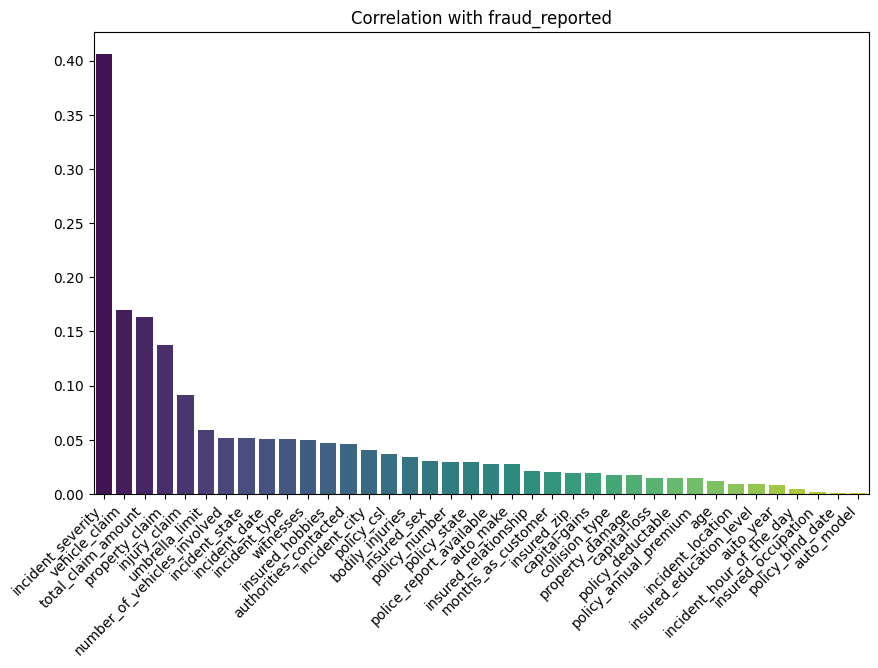

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.index, y=sorted_features.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title(f'Correlation with {target_column}')
plt.show()

In [ ]:
# for i in cleaned_df:
#   print(f'{i}:{cleaned_df[i].unique()}\n\n\n')

In [ ]:
cleaned_df.iloc[:, :-1]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,0.684760,0.644444,0.468247,0.989474,1.0,0.5,0.333333,0.603112,0.090909,0.188769,...,0.5,0.666667,1.0,0.622801,0.303497,0.550063,0.654296,0.769231,0.026316,0.45
1,0.475992,0.511111,0.269370,0.668421,0.5,0.5,1.000000,0.473214,0.545455,0.199478,...,0.0,0.000000,0.0,0.043285,0.036364,0.032953,0.043276,0.615385,0.315789,0.60
2,0.279749,0.222222,0.653098,0.434737,1.0,0.0,1.000000,0.606972,0.545455,0.002766,...,1.0,1.000000,0.0,0.300906,0.358974,0.162653,0.289722,0.307692,0.789474,0.60
3,0.534447,0.488889,0.141334,0.020000,0.0,0.5,1.000000,0.608582,0.636364,0.932699,...,0.5,0.666667,0.0,0.551298,0.295571,0.267850,0.637187,0.230769,0.894737,0.95
4,0.475992,0.555556,0.296730,0.970526,0.0,1.0,0.333333,0.712760,0.636364,0.946264,...,0.0,0.333333,0.0,0.055739,0.060606,0.027461,0.056359,0.000000,0.815789,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.006263,0.422222,0.935920,0.070526,1.0,1.0,0.333333,0.543574,0.090909,0.006209,...,0.0,0.333333,0.0,0.758579,0.813054,0.368399,0.767015,0.461538,0.157895,0.55
996,0.594990,0.488889,0.095846,0.954737,0.0,0.0,0.333333,0.621622,0.090909,0.933013,...,1.0,1.000000,0.0,0.943912,0.842890,0.763836,0.908919,1.000000,0.736842,1.00
997,0.271399,0.333333,0.909953,0.541053,1.0,0.5,0.000000,0.588604,0.363636,0.066505,...,1.0,1.000000,1.0,0.587006,0.349650,0.316857,0.659580,0.846154,0.500000,0.05
998,0.956159,0.955556,0.481995,0.874737,0.0,1.0,1.000000,0.572145,0.545455,0.060831,...,0.0,0.333333,1.0,0.408291,0.243357,0.220532,0.458800,0.076923,0.131579,0.15


In [ ]:
selected=[]
for index,value in sorted_features.items():
  if value>0.04 and index !='incident_date':
    selected.append(index)
selected.append('age')
print(selected)

['incident_severity', 'vehicle_claim', 'total_claim_amount', 'property_claim', 'injury_claim', 'umbrella_limit', 'number_of_vehicles_involved', 'incident_state', 'incident_type', 'witnesses', 'insured_hobbies', 'authorities_contacted', 'incident_city', 'age']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cleaned_df[selected], cleaned_df['fraud_reported'], test_size = 0.25, random_state = 20)

#Oversamling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)

In [ ]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
after_sampling=y_train_resampled.value_counts()
after_sampling

0.0    561
1.0    561
Name: fraud_reported, dtype: int64

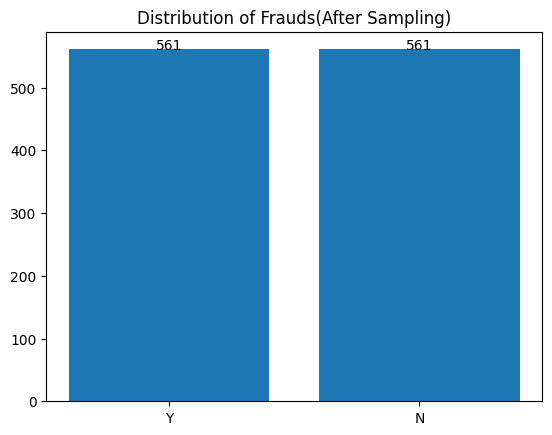

In [ ]:
plt.bar(['Y','N'],after_sampling.values)
addlabels(['Y','N'],after_sampling.values)
plt.title("Distribution of Frauds(After Sampling)")
plt.show()

#Train Models

##Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
pred_DT=DT.predict(X_test)

In [ ]:
score_DT=DT.score(X_test,y_test)
score_DT

0.812

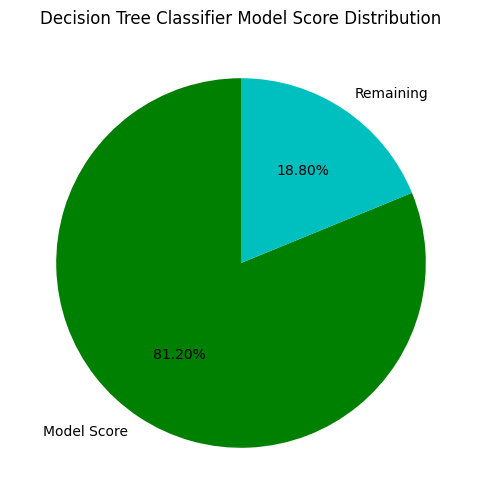

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie([score_DT*100, (1-score_DT)*100], labels=['Model Score', 'Remaining'], autopct='%1.2f%%', colors=['g', 'c'], startangle=90)
plt.title('Decision Tree Classifier Model Score Distribution')
plt.show()

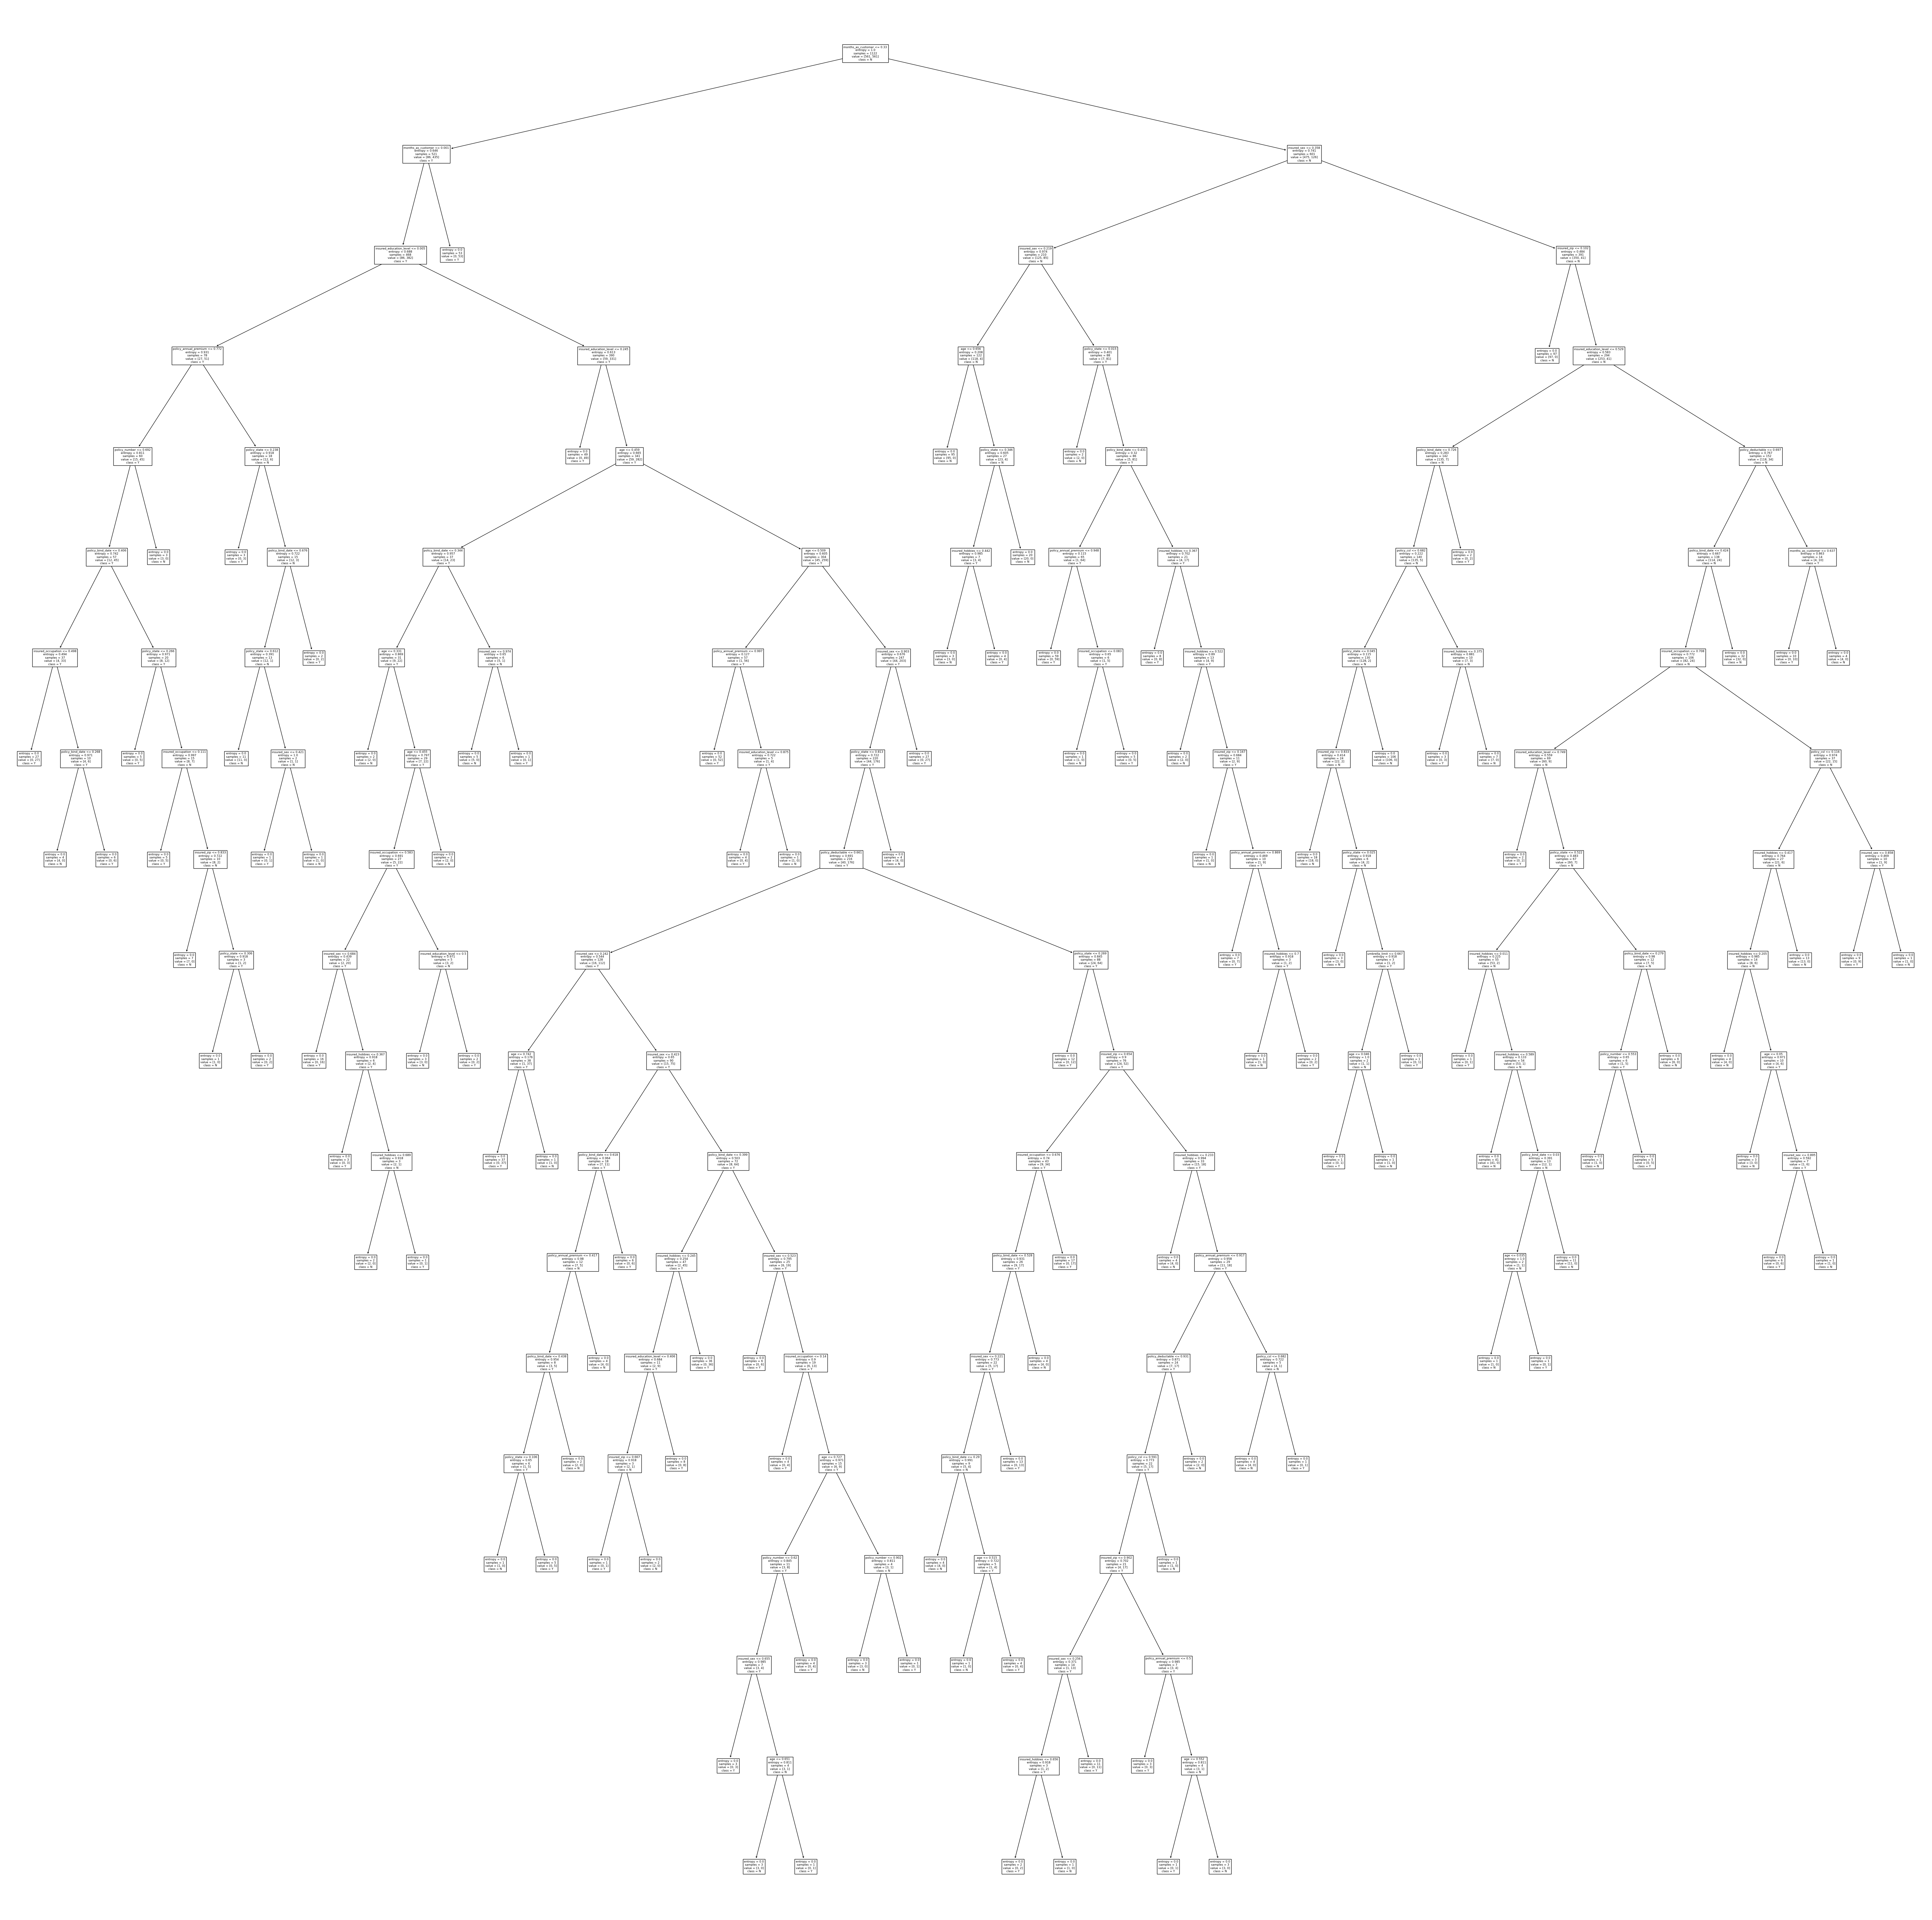

In [ ]:
fig, ax = plt.subplots(figsize=(80, 80))
plot_tree(DT,ax=ax,feature_names=[col for col in cleaned_df.columns if col != 'fraud_reported'],
               class_names=list(df['fraud_reported'].value_counts().index))
plt.show()

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR=LogisticRegression()

In [ ]:
LR.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
pred_LR=LR.predict(X_test)

In [ ]:
score_LR=LR.score(X_test,y_test)
score_LR

0.772

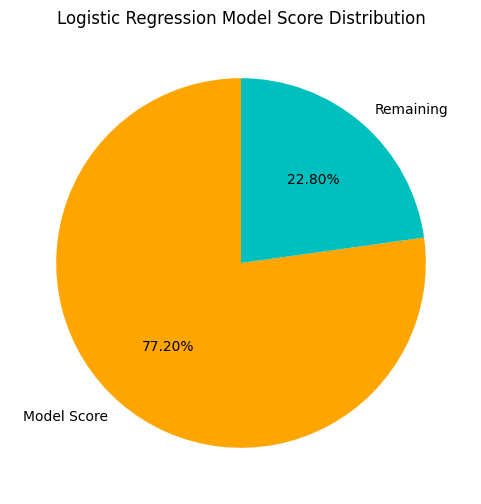

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie([score_LR*100, (1-score_LR)*100], labels=['Model Score', 'Remaining'], autopct='%1.2f%%', colors=['orange', 'c'], startangle=90)
plt.title('Logistic Regression Model Score Distribution')
plt.show()

##Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVM=SVC()

In [ ]:
SVM.fit(X_train_resampled, y_train_resampled)

SVC()

In [ ]:
pred_SVM=SVM.predict(X_test)

In [ ]:
score_SVM=SVM.score(X_test,y_test)
score_SVM

0.792

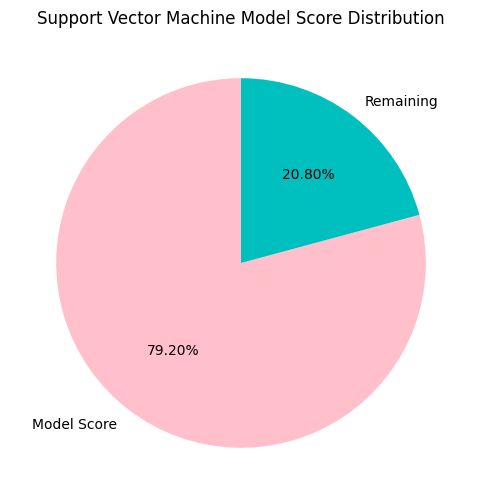

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie([score_SVM*100, (1-score_SVM)*100], labels=['Model Score', 'Remaining'], autopct='%1.2f%%', colors=['pink', 'c'], startangle=90)
plt.title('Support Vector Machine Model Score Distribution')
plt.show()

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB=GaussianNB()

In [ ]:
NB.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [ ]:
pred_NB=NB.predict(X_test)

In [ ]:
score_NB=NB.score(X_test,y_test)
score_NB

0.652

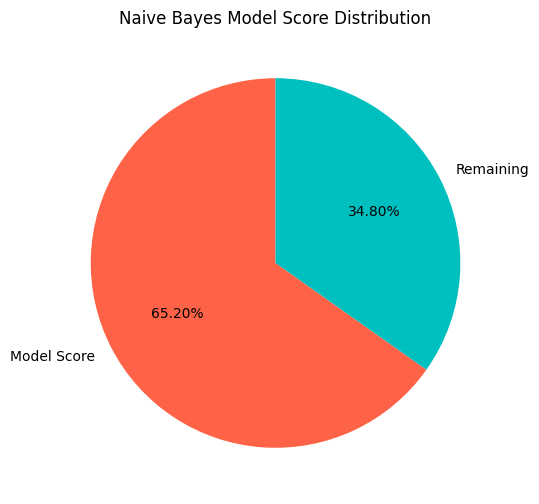

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie([score_NB*100, (1-score_NB)*100], labels=['Model Score', 'Remaining'], autopct='%1.2f%%', colors=['tomato', 'c'], startangle=90)
plt.title('Naive Bayes Model Score Distribution')
plt.show()

#Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,mean_squared_error

In [ ]:
pred_final = (pred_DT+pred_LR+pred_SVM+pred_NB)/4.0

In [ ]:
mean_squared_error(y_test, pred_final)

0.16575

In [ ]:
from sklearn.ensemble import VotingClassifier
final_model = VotingClassifier(estimators=[('dt',DT),('lr', LR), ('svm', SVM), ('nb', NB)], voting='hard')

In [ ]:
final_model.fit(X_train_resampled, y_train_resampled)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy')),
                             ('lr', LogisticRegression()), ('svm', SVC()),
                             ('nb', GaussianNB())])

In [ ]:
pred_latest = final_model.predict(X_test)

#Score

In [ ]:
mean_squared_error(y_test, pred_latest)

0.192

In [ ]:
final_score=final_model.score(X_test,y_test)
final_score

0.808

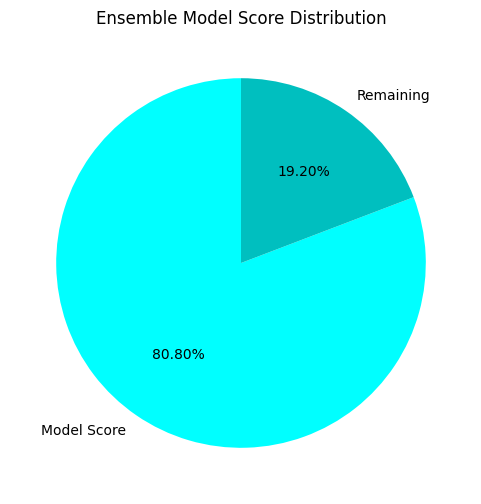

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie([final_score*100, (1-final_score)*100], labels=['Model Score', 'Remaining'], autopct='%1.2f%%', colors=['aqua', 'c'], startangle=90)
plt.title('Ensemble Model Score Distribution')
plt.show()

In [ ]:
cm=confusion_matrix(y_test, pred_latest)
cm

array([[168,  24],
       [ 24,  34]])

Text(0.5, 23.52222222222222, 'Predicted label')

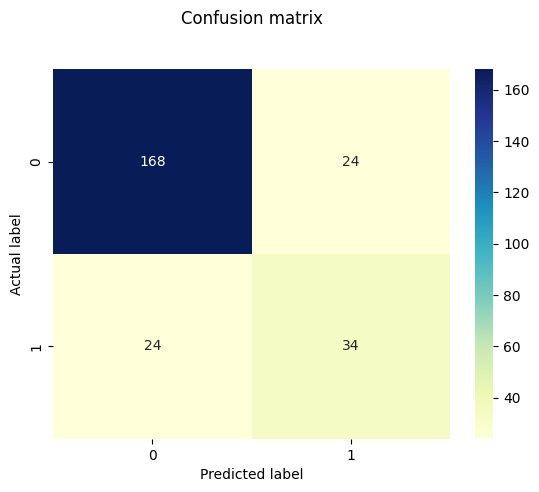

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

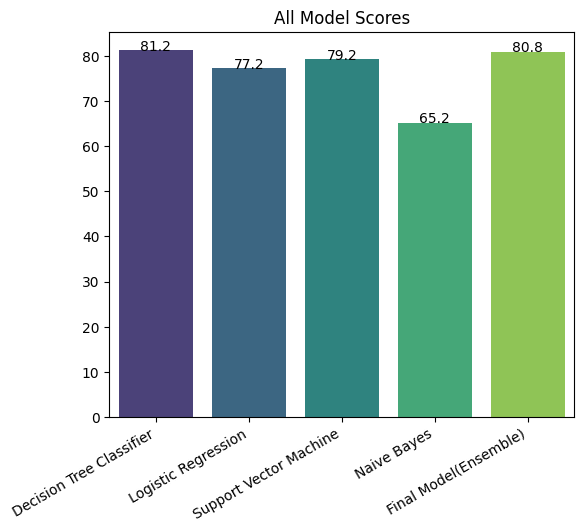

In [ ]:
labels_models=['Decision Tree Classifier', 'Logistic Regression', 'Support Vector Machine','Naive Bayes', 'Final Model(Ensemble)']
score_models=np.array([score_DT,score_LR,score_SVM,score_NB, final_score])*100
round_score = np.round(score_models, decimals=2)
score_models= round_score.tolist()
plt.figure(figsize=(6, 5))
sns.barplot(x=labels_models, y=score_models, palette="viridis")
addlabels(labels_models,score_models)
plt.xticks(rotation=30, ha="right")
plt.title('All Model Scores')
plt.show()

#Interface

In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
def updated_nominal_value(name,value):
  a=df.index[df[name] == value].tolist()
  return cleaned_df.loc[a[0],name]

In [ ]:
def updated_value(name,value):
  a=(value - cleaned_df[name].min()) / (cleaned_df[name].max() - cleaned_df[name].min())
  return a

In [ ]:
def on_button_click(change):
  a1=updated_nominal_value('incident_severity',incident_severity)
  a2=updated_value('vehicle_claim',vehicle_claim)
  a3=updated_value('total_claim_amount',total_claim_amount)
  a4=updated_value('property_claim',property_claim)
  a5=updated_value('injury_claim',injury_claim)
  a6=updated_value('umbrella_limit',umbrella_limit)
  a7=updated_nominal_value('number_of_vehicles_involved',number_of_vehicles_involved)
  a8=updated_nominal_value('incident_state',incident_state)
  a10=updated_nominal_value('incident_type',incident_type)
  a11=updated_nominal_value('witnesses',witnesses)
  a12=updated_nominal_value('insured_hobbies',insured_hobbies)
  a13=updated_nominal_value('authorities_contacted',authorities_contacted)
  a14=updated_nominal_value('incident_city',incident_city)
  a15=updated_value('age',age)

  data_tuple=(a1,a2,a3,a4,a5,a6,a7,a8,a10,a11,a12,a13,a14,a15)
  reshaped_data = np.array(data_tuple).reshape(1, -1)
  prediction = final_model.predict(reshaped_data)

  with output_area:
    print("The Fraud Check Result is=> ")
    index_n=cleaned_df.index[cleaned_df['fraud_reported'] == prediction[0]].tolist()
    final=df.loc[index_n[0],'fraud_reported']
    if final =='N': print('No')
    else: print('Yes')
    print('\n\n')

In [ ]:
incident_severity='Minor Damage' #@param ['Minor Damage', 'Total Loss', 'Major Damage', 'Trivial Damage']
vehicle_claim=348 #@param {type:"number"}
total_claim_amount=2048 #@param {type:"number"}
property_claim=2350 #@param {type:"number"}
injury_claim=20000 #@param {type:"number"}
umbrella_limit=124 #@param {type:"number"}
number_of_vehicles_involved="2" #@param [1,2,3,4,5]
incident_state='NY' #@param ['NY', 'SC', 'WV', 'VA', 'NC', 'PA', 'OH']
age=35 #@param {type:"slider", min:19, max:64}
incident_type='Single Vehicle Collision' #@param ['Multi-vehicle Collision', 'Single Vehicle Collision', 'Vehicle Theft','Parked Car']
witnesses="1" #@param [0, 1,2,3,4]
insured_hobbies='paintball' #@param ['reading', 'exercise', 'paintball', 'bungie-jumping', 'movies', 'golf','camping', 'kayaking', 'yachting', 'hiking', 'video-games', 'skydiving','base-jumping', 'board-games', 'polo', 'chess', 'dancing', 'sleeping','cross-fit', 'basketball']
authorities_contacted='Other' #@param ['Police', 'Fire', 'Other', 'Ambulance', 'None']
incident_city='Riverwood' #@param ['Springfield', 'Arlington', 'Columbus', 'Northbend', 'Hillsdale','Riverwood', 'Northbrook']

button = widgets.Button(description="Check Fraud!")

button.on_click(on_button_click)
output_area = widgets.Output()

display(button, output_area)

Button(description='Check Fraud!', style=ButtonStyle())

Output()

IndexError: list index out of range